# Transitorios 2

In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Siguiendo con el problema anterior y alcanzado el régimen estacionario, la carga de 100 $\Omega$ se cortocircuita. Estudiar el transitorio que se genera y dibujar voltaje e intensidad en la mitad de la línea.

In [3]:
# Trabajamos en el SI. Datos del problema
v0g=10.   # Voltaje del generador
z0=75.    # Impedancia caracteristica
zg=50.   # Impedancia del generador
zl=0.    # Impedancia de carga
c=299792458.0
vo=0.25*c   # Velocidad de onda
lol=100.    # Longitud de la linea

In [4]:
gammaL=(zl-z0)/(zl+z0)  # Coef. reflex. carga
gammaG=(zg-z0)/(zg+z0)  # Coef. reflex. generador
dt=lol/vo           # Intervalo de tiempo (en ns)
zlini=100           # Impedancia de carga inicial
iin0=v0g/(zg+zlini)         # Intensidad segun TC
vin0=zlini*iin0      # Voltaje segun TC
ifi=v0g/zg
vfi=0
print('Voltaje (V) e intensidad (mA) antes de cortocircuitar:\n',vin0,iin0*1E3)

Voltaje (V) e intensidad (mA) antes de cortocircuitar:
 6.666666666666667 66.66666666666667


Voltaje e intensidad de la onda generada por el cortocircuito:

In [5]:
vin=-vin0
iin=-vin/z0
print(vin,iin)

-6.666666666666667 0.08888888888888889


In [6]:
def transihN(t):
### Variables globales: dt, vin, z0, gammaG, gammaL ###
    ndt=int(np.floor(t/dt) )      # Numero de intervalos con reflexion en t
    ins=np.ones(ndt+1,dtype=float)    # Intensidades reflejadas
    inst=np.ones(ndt+1,dtype=float)   # Intensidades totales
    vos=np.ones(ndt+1,dtype=float)    # Voltajes reflejados
    vost=np.ones(ndt+1,dtype=float)   # Voltajes totales
    vos[0]=vin
    ins[0]=-vin/z0
    vost[0]=vos[0]
    inst[0]=ins[0]
    for i in range(1,ndt+1):          # Si ndt==0 no hace nada
        if i%2 != 0:                  
            vr=vos[i-1]*gammaG
            ir=vr/z0  
        else:
            vr=vos[i-1]*gammaL
            ir=-vr/z0   
        vos[i]=vr
        vost[i]=vost[i-1]+vr
        ins[i]=ir
        inst[i]=inst[i-1]+ir
    return (vos,ins,vost,inst)

In [7]:
def transiztN(z,t):
### Variables globales: dt, vin, z0, gammaG, gammaL, vo ###
    vose , inse , voste,inste = transihN(t)
    ndt=int(np.floor(t/dt))     # Numero de intervalos cumplidos
    rdt=t-ndt*dt
    if ndt == 0:
        if lol-z<rdt*vo:  # La onda llega a z
            return voste[0],inste[0]
        else:
            return 0,0
    elif ndt%2 == 0:    # no par de reflexiones
        if lol-z<rdt*vo:  # La onda reflejada llega a z
            return voste[ndt],inste[ndt]
        else:         
            return voste[ndt-1],inste[ndt-1]
    else:             # no impar de reflexiones
        if z<rdt*vo:      
            return voste[ndt],inste[ndt]
        else:
            return voste[ndt-1],inste[ndt-1]

Voltajes e intensidades reflejados:

In [8]:
vosp,insp,vostp,instp = transihN(5e-6)
print(vosp)
print(insp)

[-6.66666667  1.33333333 -1.33333333  0.26666667]
[0.08888889 0.01777778 0.01777778 0.00355556]


Voltaje e intensidad en mitad de la línea en $t=5$ $\mu$s:

In [9]:
print(transiztN(lol/2,5E-6)[0]+vin0)
print(transiztN(lol/2,5E-6)[1]+iin0)

0.2666666666666657
0.19466666666666665


In [10]:
ndtrepre=6
tiempos=np.linspace(0,ndtrepre,100)*dt
voltajes=np.zeros(100)
vfis=np.ones(100)*vfi
ifis=np.ones(100)*ifi
intensidades=np.zeros(100)
for i, tiempo in enumerate(tiempos):
    voltajes[i] , intensidades[i] = transiztN(lol/2,tiempo)

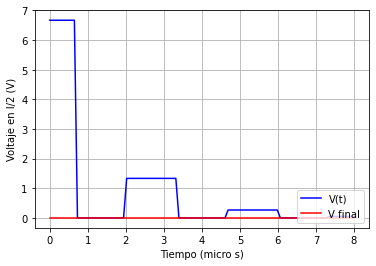

In [11]:
plt.plot(tiempos*1e6,voltajes+vin0,c='b',label='V(t)')
plt.plot(tiempos*1e6,vfis,c='r',label='V final')
plt.grid()
plt.xlabel('Tiempo (micro s)')
plt.ylabel('Voltaje en l/2 (V)')
plt.legend(loc=4)
plt.show()

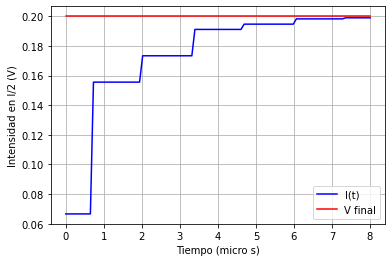

In [12]:
plt.plot(tiempos*1e6,intensidades+iin0,c='b',label='I(t)')
plt.plot(tiempos*1e6,ifis,c='r',label='V final')
plt.grid()
plt.xlabel('Tiempo (micro s)')
plt.ylabel('Intensidad en l/2 (V)')
plt.legend(loc=4)
plt.show()